# Active acoustic data analysis for 18Hz **and** 38Hz data
**Explore data :** 
1) **Data structure** : NetCDF4 : its variables
2) **Time dimension** : How many sample by seasons / year ? At what time was the data recorded ?
3) **Space dimension** : Where was the data recorded ?
4) **Time and space dimensions** : The data at the time and location it was recorded

#### Imports

In [1]:
%load_ext autoreload
%autoreload 2
from data_extraction_functions import *

In [2]:
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import datetime
import pandas as pd
import xarray as xr
from shapely.geometry import Point, Polygon
import shutil
import os
import math

## Explore data

In [4]:
base_path = "../data/acoustic_data/"
eighteen_hz_path = base_path+"18Hz/IMOS_18Hz"
eighteen_and_thirty_eight_hz_path = base_path+"18_38Hz/IMOS_18_and_38_Hz"
thirty_eight_hz_path = base_path+"38Hz"

## **1) Data structure**

### Test de xarray

In [5]:
list_cdf_files=get_list_files(folder_path=eighteen_and_thirty_eight_hz_path) # Open folder containing all nc files and get list of all nc files path
dataset_xr = open_dataset_xr(3, list_cdf_files)
depth = dataset_xr["DEPTH"]
print(depth.values)
close_dataset(dataset_xr)

[   2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5   42.5   47.5
   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5   92.5   97.5
  102.5  107.5  112.5  117.5  122.5  127.5  132.5  137.5  142.5  147.5
  152.5  157.5  162.5  167.5  172.5  177.5  182.5  187.5  192.5  197.5
  202.5  207.5  212.5  217.5  222.5  227.5  232.5  237.5  242.5  247.5
  252.5  257.5  262.5  267.5  272.5  277.5  282.5  287.5  292.5  297.5
  302.5  307.5  312.5  317.5  322.5  327.5  332.5  337.5  342.5  347.5
  352.5  357.5  362.5  367.5  372.5  377.5  382.5  387.5  392.5  397.5
  402.5  407.5  412.5  417.5  422.5  427.5  432.5  437.5  442.5  447.5
  452.5  457.5  462.5  467.5  472.5  477.5  482.5  487.5  492.5  497.5
  502.5  507.5  512.5  517.5  522.5  527.5  532.5  537.5  542.5  547.5
  552.5  557.5  562.5  567.5  572.5  577.5  582.5  587.5  592.5  597.5
  602.5  607.5  612.5  617.5  622.5  627.5  632.5  637.5  642.5  647.5
  652.5  657.5  662.5  667.5  672.5  677.5  682.5  687.5  692.5  697.5
  702.

### **Test echogram**

(33102, 240)


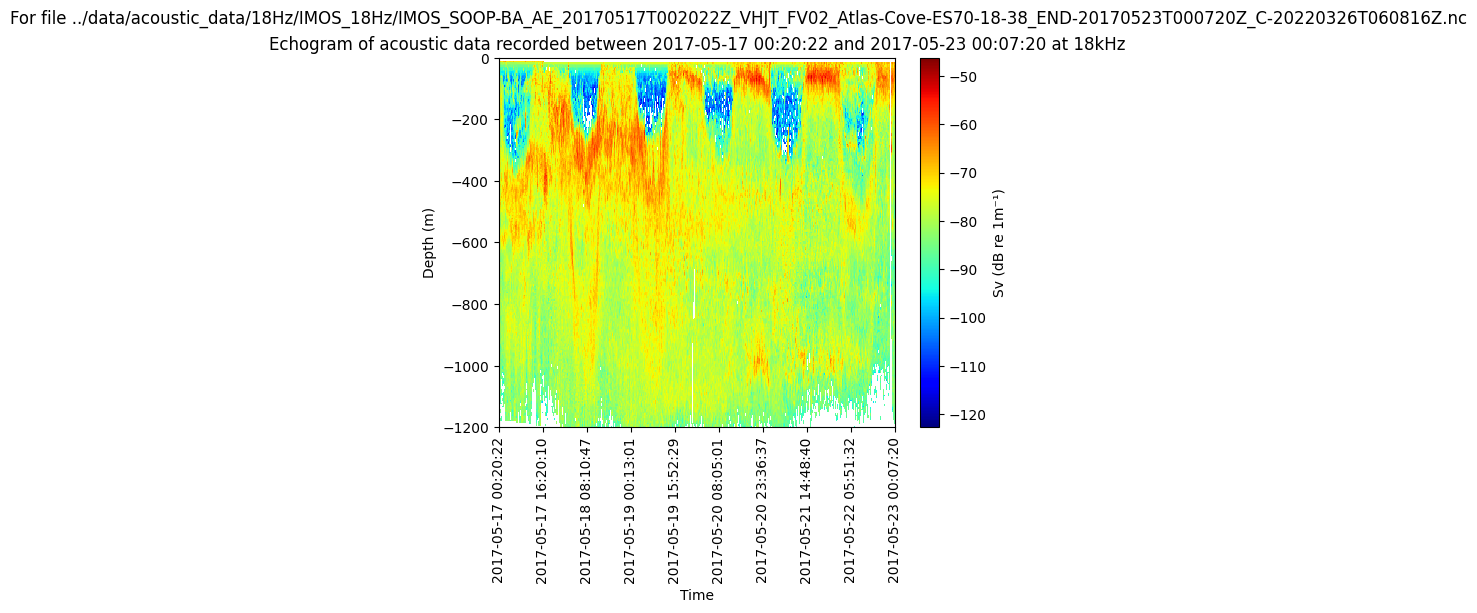

In [9]:
list_cdf_files=get_list_files(folder_path=eighteen_hz_path) # Open folder containing all nc files and get list of all nc files path
dataset = open_dataset(3, list_cdf_files) # Open file i
# print(dataset)
# show_dataset(dataset)
plot_echogram(dataset, 0, list_cdf_files[3], save=True, save_path=eighteen_hz_path) # plot echogram of file path (dataset) at freq 0
close_dataset(dataset) # close dataset

## **2) Time dimension**

### **Test histogram**

There are 33102 samples in 3th dataset


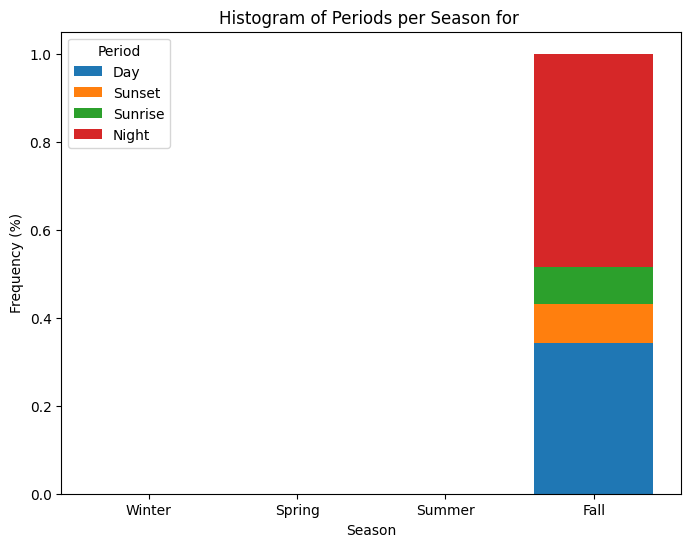

In [10]:
# Test for 1 file
list_cdf_files=get_list_files(folder_path=eighteen_hz_path) # Open folder containing all nc files and get list of all nc files path
i = 3 # Chose file to open
dataset=open_dataset(i, list_cdf_files) # Open file i
season_counts  = count_season(dataset) # Count occurences of period d in season s in file i and 

# Normalization of counts into frequency
n = get_datetime(dataset).shape[0]
for season in season_counts.keys():
    season_counts[season]=season_counts[season]/n
print(f"There are {n} samples in {i}th dataset") 

plot_histogram(season_counts) # Plot histogram
dataset.close() # Close dataset

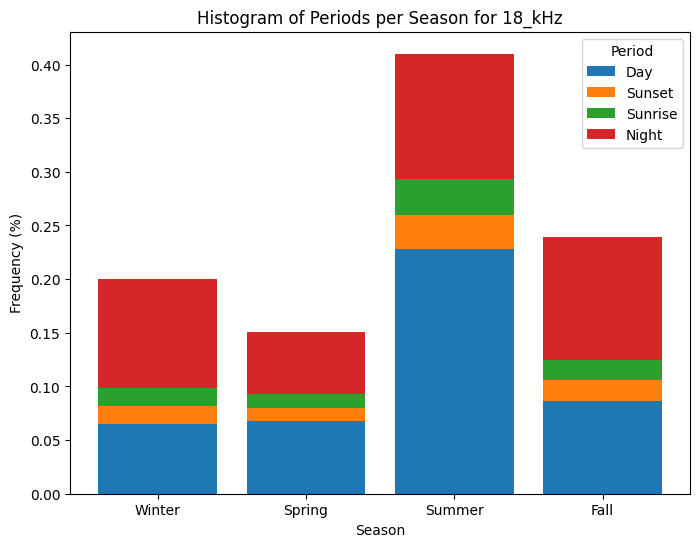

There is a total of  1347887  samples


In [6]:
# Test plot histogram on all nc files of folder 

list_cdf_files=get_list_files(folder_path=eighteen_hz_path) # Open folder containing all nc files and get list of all nc files path
all_seasons_counts, n_all= count_season_all_files(list_cdf_files) # Open file i
plot_histogram(all_seasons_counts, save=True, save_path=eighteen_hz_path, dataset_name="18_kHz") # Plot histogram
print("There is a total of ", n_all, " samples")

### **Get missing data relatively to frequences of sonar and depth**

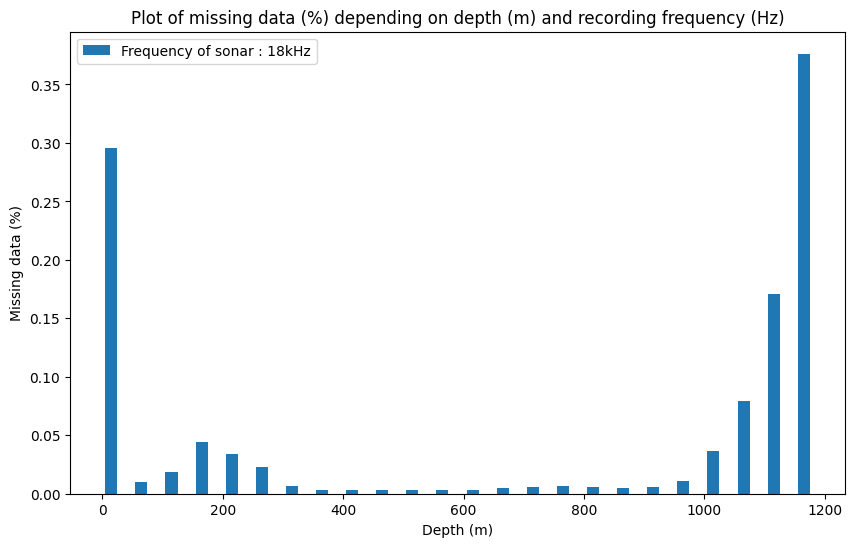

In [9]:
# test get_depth_depending_on_freq_sonar()
list_cdf_files=get_list_files(folder_path=eighteen_hz_path)    # Get all netcdf files path of folder chosen
ds = open_dataset(3, list_cdf_files)    # Open netCDF into nc.Dataset

# Get parameters
depths = ds['DEPTH'][:]
channels_dict={0 : '18kHz'}

# Count missing datas
missing_datas = count_missing_data(ds, ['18kHz'])

# Plot missing datas
plot_missing_data(missing_datas, depths, 10, channels_dict, title=f"file 3", save=True, save_path=eighteen_hz_path)

# Close dataset
close_dataset(ds)     # Close dataset

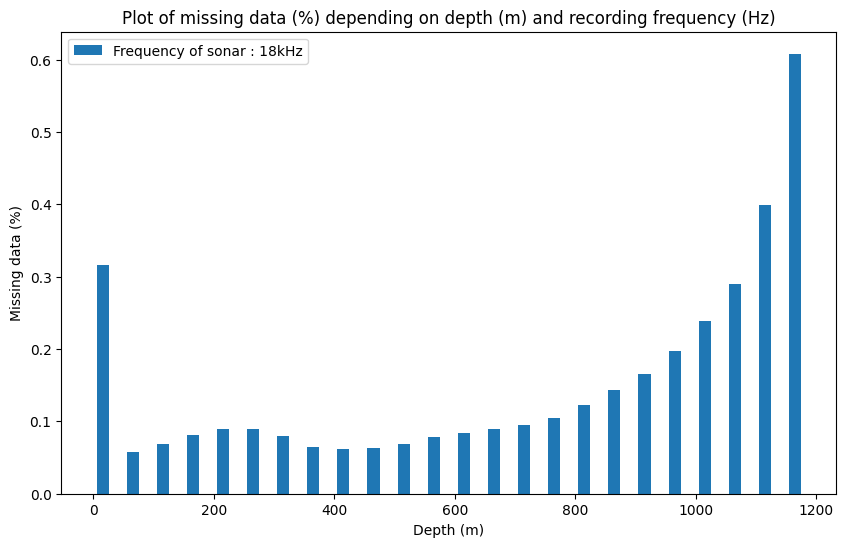

In [10]:
all_missing_datas=get_missing_data_all_files()
plot_missing_data(all_missing_datas, depths, 10, channels_dict, title="all_18_and_38Hz", save=True, save_path=eighteen_hz_path)

## **3) Space dimension**

## Display set of trajectories

-66.6509911624 -10.43668 57.0784265533 170.165738334


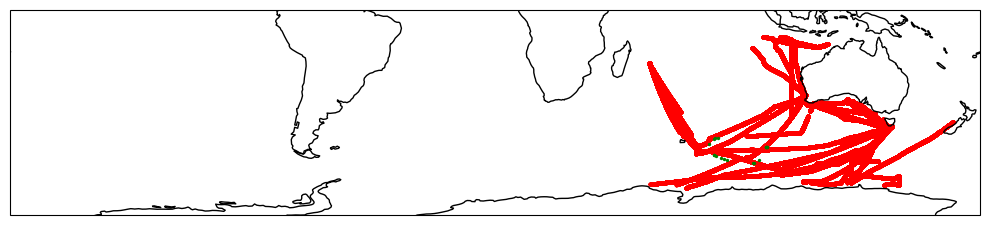

In [11]:
display_all_trajectories_folder(folder_path=eighteen_hz_path, enveloppe=True, save=True)

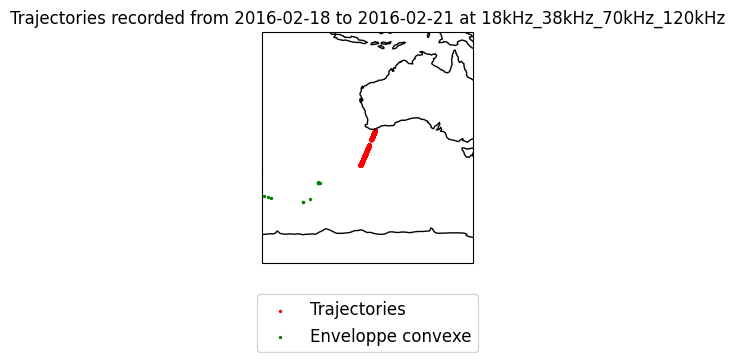

In [10]:
# Using Cartopy
list_cdf_files=get_list_files()    # Get all netcdf files path of folder chosen
ds = open_dataset_xr(3, list_cdf_files)    # Open netCDF into xarray
# depth = ds["DEPTH"].values
# print(type(depth))
display_trajectories(ds, enveloppe=True, save=True)      # Display trajectories
close_dataset(ds)     # Close dataset

### 4. Classify data

In [14]:
classify_seasons(folder_path=eighteen_hz_path) # Done for [18 and 38kz]

../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz
../data/acoustic_data/18Hz


OSError: [Errno 28] No space left on device: '../data/acoustic_data/18Hz/IMOS_18Hz/IMOS_SOOP-BA_AE_20160108T163457Z_VLMJ_FV02_Investigator-EK60-18-38-70-120_END-20160120T110750Z_C-20210805T091518Z.nc' -> '../data/acoustic_data/18Hz/summer/IMOS_SOOP-BA_AE_20160108T163457Z_VLMJ_FV02_Investigator-EK60-18-38-70-120_END-20160120T110750Z_C-20210805T091518Z.nc'

In [88]:
# test if every file was classified
import random 
folder = "../data/acoustic_data/18_38Hz/IMOS_18_and_38_Hz"
all = get_list_files(folder)
winter = [os.path.basename(f) for f in get_list_files(folder+"/winter")]
summer = [os.path.basename(f) for f in get_list_files(folder+"/summer")]
spring = [os.path.basename(f) for f in get_list_files(folder+"/spring")]
fall = [os.path.basename(f) for f in get_list_files(folder+"/fall")]

for f in all : 
    f = os.path.basename(f)
    if f not in winter and f not in summer and f not in spring and f not in fall : 
        print("nooo")

# test if file well classified
for i in range(0,10) : 
    # verif hiver
    r = random.randint(0, len(winter)-1)
    ds=nc.Dataset(folder+"/winter/"+winter[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {6,7,8} != {})
    ds.close()

    # verif spring
    r = random.randint(0, len(spring)-1)
    ds=nc.Dataset(folder+"/spring/"+spring[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {9, 10, 11} != {})
    ds.close()

    # verif summer
    r = random.randint(0, len(summer)-1)
    ds=nc.Dataset(folder+"/summer/"+summer[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {12, 1, 2} != {})
    ds.close()

    # verif summer
    r = random.randint(0, len(fall)-1)
    ds=nc.Dataset(folder+"/fall/"+fall[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {3, 4, 5} != {})
    ds.close()

In [15]:
def classify_period(folder_path:str)-> None : 
        list_cdf_files=get_list_files(folder_path=folder_path)
        for i, filepath in enumerate(list_cdf_files):
            ds = nc.Dataset(filepath, mode='r')
            parent_folder = os.path.dirname(folder_path) # Already in season
            print(parent_folder)
            times = np.unique(ds.variables['day'][:])
            for time in times : 
                if time == 1 : # Day
                    shutil.copy(filepath, parent_folder+"/Day") 
                elif time == 2 : # Sunset
                    shutil.copy(filepath, parent_folder+"/Sunset") 
                elif time == 3 : # Sunrise
                    shutil.copy(filepath, parent_folder+"/Sunrise") 
                elif time == 4 : # Night
                    shutil.copy(filepath, parent_folder+"/Night") 
                else : 
                    print("error, season not managed")
                    return
            ds.close()

In [41]:
# classify_period(eighteen_hz_path)

In [58]:
def get_n_data_in_hull(folder_path:str) -> Tuple[int, int] :
    """
    Counts the number of data samples inside and outside a convex hull.

    Parameters:
    ----------
    folder_path : str
        The path to the folder containing NetCDF (.nc) files.

    Returns:
    -------
    Tuple[int, int]
        - `n_samples_in_hull` : The total number of samples inside the convex hull.
        - `n_total_samples` : The total number of samples across all files.
    """
    hull = get_enveloppe_convexe_into_list_tuple()
    hull = Polygon(hull)

    list_files = get_list_files(folder_path)
    n_samples_in_hull = 0
    n_total_samples = 0

    for file_path in list_files : 
        ds=nc.Dataset(file_path, mode='r')
        lon, lat = ds.variables["LONGITUDE"][:], ds.variables["LATITUDE"][:]
        points_in_hull = are_points_in_polygon(lon, lat, hull)
        n_samples_in_hull += np.sum(points_in_hull)
        n_total_samples += lon.shape[0]
    return n_samples_in_hull, n_total_samples

In [59]:
n_hull, n_total = get_n_data_in_hull("/home/elise/Documents/M1-BIM/S2/active_acoutics_analysis_sea_elephants/data/acoustic_data/18_38Hz/summer")
proportion = n_hull/n_total *100
print(n_hull, n_total, proportion)

8254 332770 2.4803918622471977


In [51]:
polygon = get_enveloppe_convexe_into_list_tuple()
polygon = Polygon(polygon) # transform into shapely object
list_cdf_files=get_list_files(folder_path=eighteen_hz_path) # Open folder containing all nc files and get list of all nc files path
i = 3 # Chose file to open
ds=open_dataset(i, list_cdf_files) # Open file i
lon, lat = ds.variables["LONGITUDE"][:], ds.variables["LATITUDE"][:]
print(np.unique(are_points_in_polygon(lon, lat, polygon)))

[False]
